In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 120km-wo-null.csv to 120km-wo-null.csv


In [4]:
import pandas as pd
import io
  
df = pd.read_csv(io.BytesIO(uploaded['120km-wo-null.csv']))
print(df)

      YEAR  MO  DY     y    x1    x2  ...   x13   x14   x15   x16   x17   x18
0     2015   1   1  0.81  0.77  0.92  ...  1.05  1.88  1.18  0.82  1.14  0.76
1     2015   1   2  1.71  1.33  1.69  ...  1.20  2.03  1.82  1.11  1.14  1.32
2     2015   1   3  1.38  0.82  1.02  ...  0.84  1.09  2.59  1.14  1.31  1.40
3     2015   1   4  1.78  2.44  1.44  ...  2.41  2.30  3.43  3.07  2.58  3.13
4     2015   1   5  4.09  3.77  4.05  ...  3.56  4.26  4.53  3.30  3.89  4.38
...    ...  ..  ..   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
1801  2019  12  27  3.95  2.65  3.82  ...  2.67  4.18  4.46  2.74  3.01  4.33
1802  2019  12  28  3.50  1.72  3.38  ...  1.71  4.13  4.55  1.67  1.64  4.36
1803  2019  12  29  3.06  2.64  3.23  ...  2.96  4.10  4.20  2.34  3.03  3.90
1804  2019  12  30  3.41  0.88  3.25  ...  1.67  4.09  4.43  2.20  1.61  4.15
1805  2019  12  31  3.50  3.02  3.61  ...  3.01  4.09  2.81  2.97  1.46  1.51

[1806 rows x 22 columns]


In [5]:
len(df)

1806

# Data preprocessing-remove null

In [6]:
df.isnull().sum().sum()

0

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum().sum()

0

In [9]:
y = df['y'].values

Text(0, 0.5, 'Solar Irradiance in W-h/m$^2$')

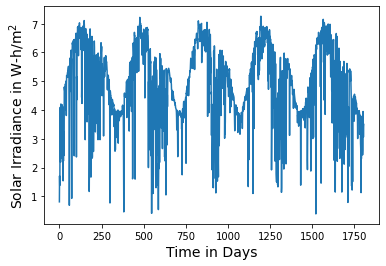

In [10]:
plt.plot(y)
plt.xlabel('Time in Days', fontsize=14)
plt.ylabel('Solar Irradiance in W-h/m$^2$', fontsize=14)

In [11]:
df_var= df[['y','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18']]
df_var

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18
0,0.81,0.77,0.92,1.37,0.85,0.96,1.08,0.96,1.48,1.64,1.13,1.05,1.14,1.05,1.88,1.18,0.82,1.14,0.76
1,1.71,1.33,1.69,1.87,1.41,1.36,0.93,1.10,1.83,1.91,1.95,1.14,1.22,1.20,2.03,1.82,1.11,1.14,1.32
2,1.38,0.82,1.02,1.23,1.39,1.32,1.10,0.91,0.92,1.74,2.26,1.41,1.25,0.84,1.09,2.59,1.14,1.31,1.40
3,1.78,2.44,1.44,2.47,2.88,2.66,2.62,2.86,2.39,3.31,3.32,2.82,2.61,2.41,2.30,3.43,3.07,2.58,3.13
4,4.09,3.77,4.05,4.32,4.37,4.11,3.79,3.07,4.03,4.51,4.53,4.16,3.71,3.56,4.26,4.53,3.30,3.89,4.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,3.95,2.65,3.82,4.22,4.34,3.72,2.63,2.62,3.87,4.38,4.54,3.47,2.76,2.67,4.18,4.46,2.74,3.01,4.33
1802,3.50,1.72,3.38,4.23,4.31,3.64,2.67,2.23,3.53,4.48,4.58,3.68,2.36,1.71,4.13,4.55,1.67,1.64,4.36
1803,3.06,2.64,3.23,4.15,4.19,3.29,2.57,1.54,3.14,4.35,4.37,3.55,2.21,2.96,4.10,4.20,2.34,3.03,3.90
1804,3.41,0.88,3.25,4.16,4.30,3.87,2.16,2.37,2.30,4.36,4.48,3.67,1.31,1.67,4.09,4.43,2.20,1.61,4.15


In [17]:
df_corr = df_var.corr()
df_corr.iloc[0]

y      1.000000
x1     0.871640
x2     0.937775
x3     0.863898
x4     0.888168
x5     0.933498
x6     0.869102
x7     0.779016
x8     0.857737
x9     0.759325
x10    0.773330
x11    0.849763
x12    0.783686
x13    0.823563
x14    0.802668
x15    0.778941
x16    0.793392
x17    0.818185
x18    0.826111
Name: y, dtype: float64

In [36]:
correlated_features = set()
for i in range(len(df_corr .columns)):
    for j in range(1):
        if df_corr.iloc[i, j] > 0.86:
            colname = df_corr.columns[i]
            correlated_features.add(colname)

In [37]:
len(correlated_features)

7

In [38]:
print(correlated_features)

{'x4', 'x5', 'x1', 'x2', 'y', 'x3', 'x6'}
